# <div align="center">Nearest Neighbour Algorithm for Traveling Salesman Problem</div>

# Import Libraies:

In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt

# City Class:

In [4]:
class City:
    def __init__(self, name, x, y):
        """
        Initialize a City object.

        Args:
            name (str): The name of the city.
            x (float): The x-coordinate of the city.
            y (float): The y-coordinate of the city.
        """
        self.name = name
        self.x = x
        self.y = y
        self.visited = False
    
    def distance_to(self, other_city):
        """
        Calculate the Euclidean distance to another city.

        Args:
            other_city (City): The other city.

        Returns:
            float: The Euclidean distance between the two cities.
        """
        return math.sqrt((self.x - other_city.x)**2 + (self.y - other_city.y)**2)

# Reading Cities from CSV File:

In [5]:
def read_cities_from_csv(file_path):
    """
    Read cities from a CSV file.

    Args:
        file_path (str): The path to the CSV file containing city data.

    Returns:
        list: A list of City objects.
    """
    cities = []
    df = pd.read_csv(file_path)
    for index, row in df.iterrows():
        name = row['City']
        x = row['x']
        y = row['y']
        cities.append(City(name, x, y))
    return cities

# Nearest Neighbor Algorithm:

In [6]:
def nearest_neighbor(cities):
    """
    Find a tour using the nearest neighbor algorithm.

    Args:
        cities (list): A list of City objects.

    Returns:
        list: A list representing the tour.
    """
    start_city = cities[14]  # Choosing arbitrary start city
    current_city = start_city
    tour = [start_city]
    current_city.visited = True
    while len(tour) < len(cities):
        nearest_city = None
        min_distance = float('inf')
        for city in cities:
            if not city.visited:
                distance = current_city.distance_to(city)
                if distance < min_distance:
                    min_distance = distance
                    nearest_city = city
        nearest_city.visited = True
        tour.append(nearest_city)
        current_city = nearest_city
    # Return to the start city
    tour.append(start_city)
    return tour

# Calculating Total Distance:

In [7]:
def calculate_total_distance(tour):
    """
    Calculate the total distance of the tour.

    Args:
        tour (list): A list representing the tour.

    Returns:
        float: The total distance of the tour.
    """
    total_distance = 0
    num_cities = len(tour)
    for i in range(num_cities - 1):
        total_distance += tour[i].distance_to(tour[i + 1])
    return total_distance

# Plotting the Tour:

In [8]:
def plot_tour(tour):
    """
    Plot the tour on a 2D coordinate plane.

    Args:
        tour (list): A list representing the tour.
    """
    # Extract x and y coordinates of cities from the tour
    x = [city.x for city in tour]
    y = [city.y for city in tour]

    # Plot the tour
    plt.figure(figsize=(8, 6))
    plt.plot(x, y, marker='o', linestyle='-')
    plt.title('TSP Tour')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.grid(True)
    plt.show()

In [9]:
# Read cities from CSV 
file_path = "Data set CSV.csv"  
cities = read_cities_from_csv(file_path)

In [10]:
# Find tour using nearest neighbor algorithm
tour = nearest_neighbor(cities)


In [11]:
# Calculate total distance of the tour
total_distance = calculate_total_distance(tour)

In [12]:
# Output the tour and total distance
print("Tour:", [city.name for city in tour])
print("Total distance:", total_distance)

Tour: [15.0, 9.0, 5.0, 7.0, 3.0, 12.0, 14.0, 10.0, 8.0, 6.0, 4.0, 11.0, 1.0, 13.0, 2.0, 15.0]
Total distance: 284.3810904080332


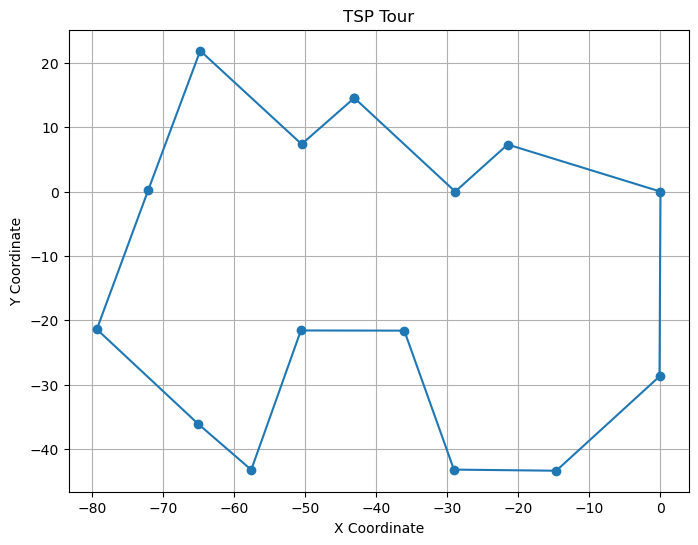

In [13]:
# Plot the tour
plot_tour(tour)